## In this quick notebook we will see a basic GNN

### Importing Libraries:

In this example we will use 2 main libraries:
*   PyTorch;
*   Torch-Geometric

In [1]:
import torch
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
from torch.nn import Linear
import torch.nn.functional as F

### Loading the 'CORA' dataset

About the Cora dataset:

The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words.

In [4]:
dataset = Planetoid(root='./data/Cora', name='Cora')
data = dataset[0]

Processing...
Done!


Visualizing basic infos about the dataset:

In [3]:
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of features/node: {dataset.num_node_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Number of validation nodes: {data.val_mask.sum()}')
print(f'Number of test nodes: {data.test_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of features/node: 1433
Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Number of validation nodes: 500
Number of test nodes: 1000
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


## Creating the first version of our GCN class
---

In [16]:
# This class inherits some methods from `torch.nn.Module`.
# For this reason, we must declare `super(GCN, self).__init__()`.

class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    # Method to do the forward pass through the neural net
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

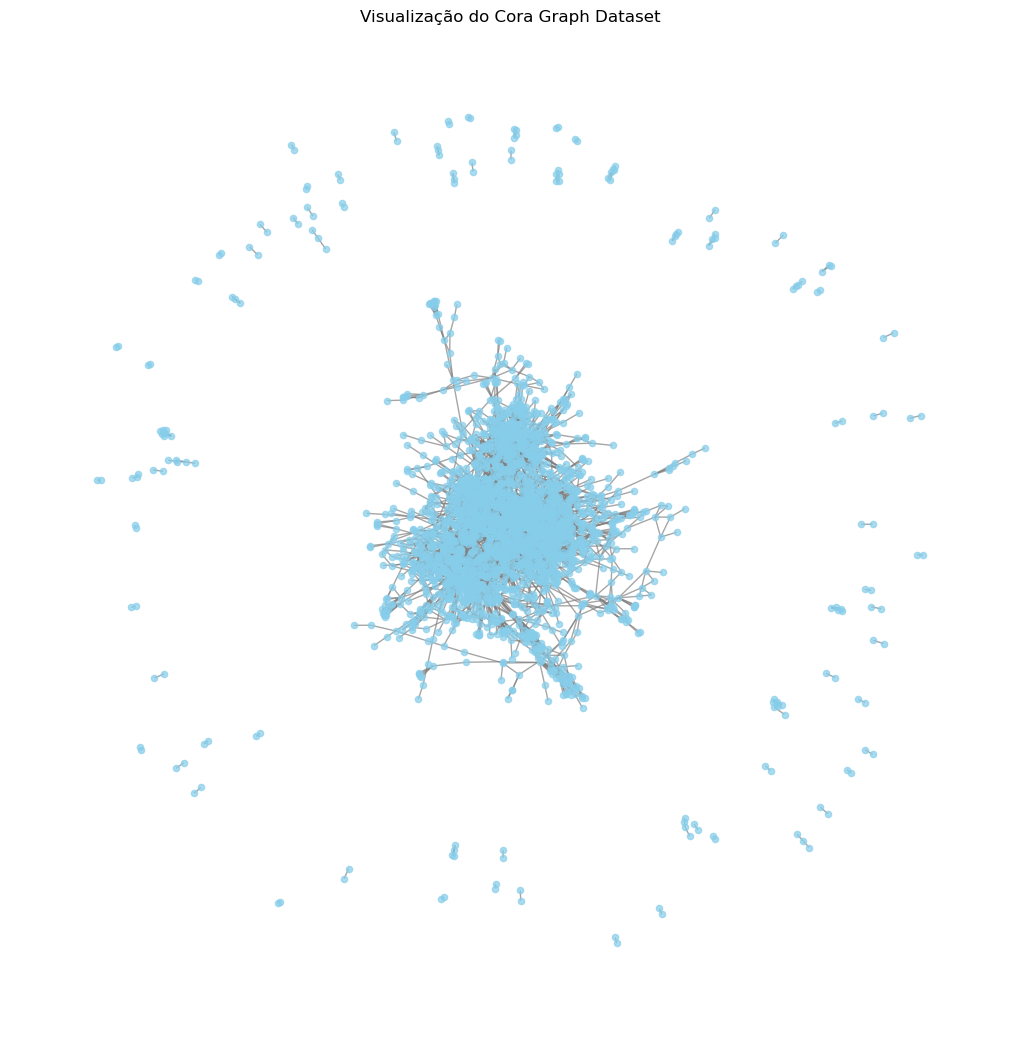

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import Planetoid

# Converter os dados em um grafo do NetworkX
G = nx.Graph()
G.add_edges_from(data.edge_index.t().numpy())

# Configurar a visualização
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Layout para a visualização

# Desenhar o grafo
nx.draw(
    G, pos, node_size=20, node_color='skyblue', edge_color='gray', 
    with_labels=False, alpha=0.7
)

plt.title('Visualização do Cora Graph Dataset')
plt.show()

/tmp/ipykernel_4541/666016205.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))(labels)


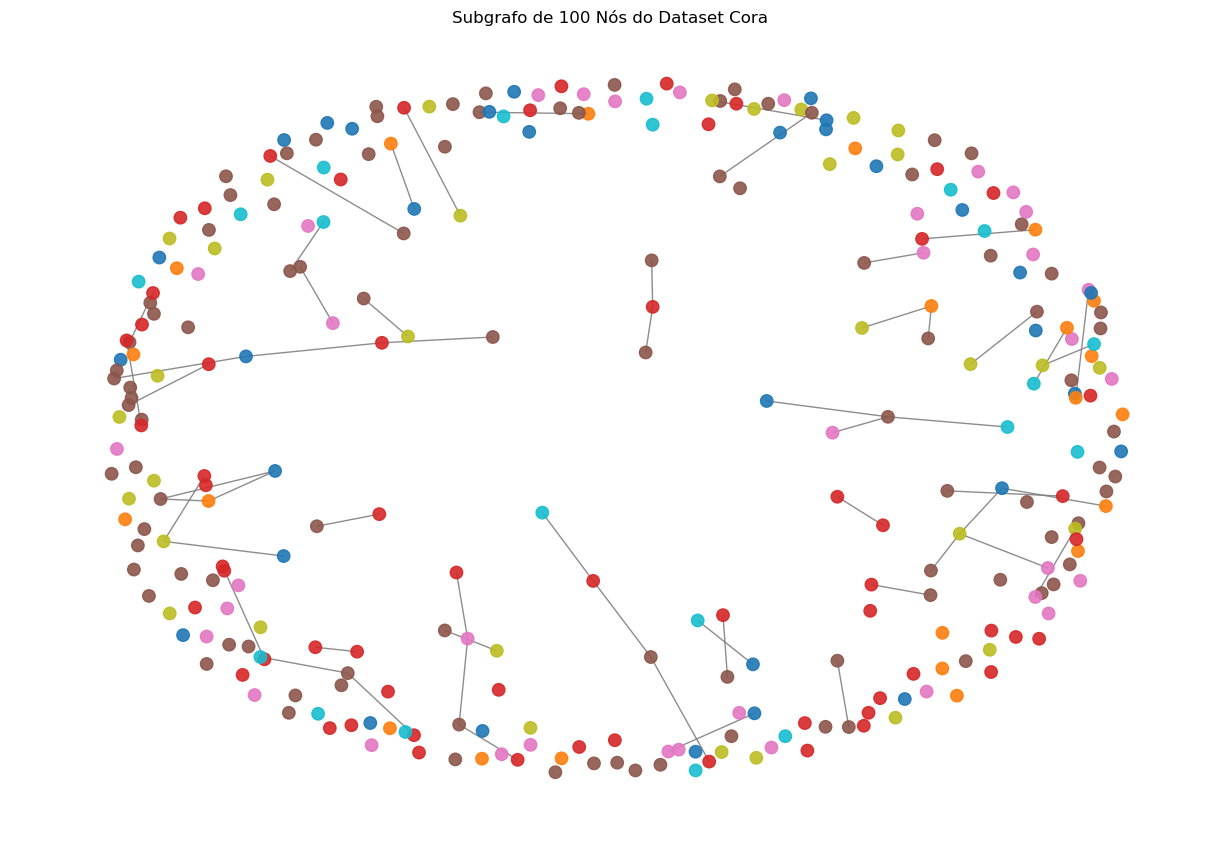

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import Planetoid
import numpy as np


# Converter os dados em um grafo do NetworkX
G = nx.Graph()
G.add_edges_from(data.edge_index.t().numpy())

# Selecionar um subgrafo com os primeiros 100 nós
subgraph_nodes = np.random.choice(data.num_nodes, 300, replace=False)
subG = G.subgraph(subgraph_nodes)

# Obter classes e mapear para cores
labels = data.y.numpy()[subgraph_nodes]
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))(labels)

# Layout com maior separação
pos = nx.spring_layout(subG, seed=42, k=0.25)  # Ajustar k para maior repulsão

# Visualizar o subgrafo
plt.figure(figsize=(12, 8))
nx.draw(
    subG, pos, node_size=80, node_color=colors, edge_color='gray', 
    with_labels=False, alpha=0.9
)

plt.title('Subgrafo de 100 Nós do Dataset Cora')
plt.show()
